# Numerical prove of Keppler 2nd


In [7]:
import numpy as np
import matplotlib.pyplot as plt

mass_sun = 1.989e30  # kg
mass_earth = 5.972e24  # kg
mass_halley = 2.2e14  # kg

G = 6.67430e-11  # m^3 kg^-1 s^-2

# perihelion
v_earth = 30.29e3  # m/s
r_earth = 147.10e9  # m

v_halley = 54.55e3  # m/s
r_halley = 0.586 * r_earth  # m 

# settings
dt = 24 * 3600  # seconds
t = 75 * 370 * 24 * 3600  # seconds
N = int(t / dt)

# Ic.
v_e = np.zeros((N,2))
v_e[0,:] = [0,v_earth]

r_e = np.zeros((N,2))
r_e[0,:] = [r_earth,0]

v_h = np.zeros((N,2))
v_h[0,:] = [0,v_halley]

r_h = np.zeros((N,2))
r_h[0,:] = [r_halley,0]


In [8]:
# Euler method earth
for i in range(1, N):
    r = np.linalg.norm(r_e[i-1,:])
    a = -G * mass_sun / r**2
    a_vec = a * r_e[i-1,:] / r  # direction of acceleration

    v_e[i,:] = v_e[i-1,:] + a_vec * dt
    r_e[i,:] = r_e[i-1,:] + v_e[i-1,:] * dt

# Euler method halley
# for i in range(1, N):
#     r = np.linalg.norm(r_h[i-1,:])
#     a = -G * mass_sun / r**2
#     a_vec = a * r_h[i-1,:] / r  # direction of acceleration

#     v_h[i,:] = v_h[i-1,:] + a_vec * dt
#     r_h[i,:] = r_h[i-1,:] + v_h[i-1,:] * dt


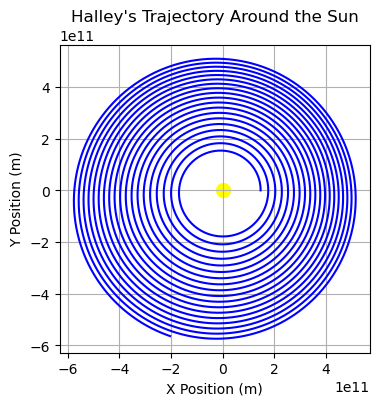

In [9]:
# Plotting the trajectory
plt.figure(figsize=(4, 4))
plt.plot(r_e[:, 0], r_e[:, 1], label='Earth Trajectory', color='blue')
plt.scatter(0, 0, color='yellow', s=100, label='Sun')  # Sun at origin
# plt.title('Earth Trajectory Around the Sun')
plt.title('Halley\'s Trajectory Around the Sun')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')

plt.grid()
#plt.legend()
plt.show()